## Reading jsons

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (7,6)
#plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json

## Read file names
path_to_json = '.'
times_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_mem.json')]


## Read json of no compact files
data_to_append = []
for js in times_files:
    data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()

## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

## Copy tables
data_time_table = data_time.copy(deep = True)
data_time_compact_table = data_time_compact.copy(deep = True)
data_mem_table = data_mem.copy(deep = True)


#Geometric data as integer
data_time['n_vertices'] = data_time['n_vertices'].astype(int)
data_time['n_half_edges'] = data_time['n_half_edges'].astype(int)
data_time['n_faces'] = data_time['n_faces'].astype(int)
data_time['n_barrier_edge_tips'] = data_time['n_barrier_edge_tips'].astype(int)

data_time_compact['n_vertices'] = data_time_compact['n_vertices'].astype(int)
data_time_compact['n_half_edges'] = data_time_compact['n_half_edges'].astype(int)
data_time_compact['n_faces'] = data_time_compact['n_faces'].astype(int)
data_time_compact['n_barrier_edge_tips'] = data_time_compact['n_barrier_edge_tips'].astype(int)

## Convert byte to gb
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/1000000000
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/1000000000
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/1000000000
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla']/1000000000
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla'] - data_mem['mem_gen_triangulation']

## Convert ms to minutes
data_time['time_to_generate_polygonal_mesh'] = data_time['time_to_generate_polygonal_mesh']/60000
data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_label_total'] = data_time['time_to_label_total']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000

data_time_compact['time_to_generate_polygonal_mesh'] = data_time_compact['time_to_generate_polygonal_mesh']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_label_total'] = data_time_compact['time_to_label_total']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000



# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

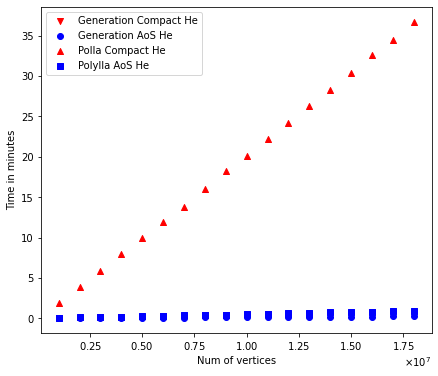

In [46]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")




In [47]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
'''
q = """SELECT data_time_table.n_vertices as "#Vertices", data_time_table.time_to_generate_polygonal_mesh as "Polylla AoS", data_time_table.time_triangulation_generation as "Triangulation AoS", data_time_compact_table.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact_table.time_triangulation_generation as "Triangulation Compact"
    FROM data_time_table, data_time_compact_table
    WHERE data_time_table.n_vertices = data_time_compact_table.n_vertices
    ORDER BY data_time_table.n_vertices
    LIMIT 10;"""
'''

q = """SELECT data_time.n_vertices as "#Vertices", data_time.time_to_generate_polygonal_mesh as "Polylla AoS", data_time.time_triangulation_generation as "Triangulation AoS", data_time_compact.time_to_generate_polygonal_mesh as "Polylla Compact", data_time_compact.time_triangulation_generation as "Triangulation Compact"
    FROM data_time, data_time_compact
    WHERE data_time.n_vertices = data_time_compact.n_vertices
    ORDER BY data_time.n_vertices Desc
    LIMIT 10"""

pysqldf(q).round(2)


,#Vertices,Polylla AoS,Triangulation AoS,Polylla Compact,Triangulation Compact
0,18000000,0.93,0.25,36.73,0.81
1,17000000,0.88,0.23,34.48,0.76
2,16000000,0.83,0.22,32.54,0.72
3,15000000,0.78,0.21,30.41,0.66
4,14000000,0.73,0.19,28.33,0.62
5,13000000,0.67,0.18,26.26,0.58
6,12000000,0.62,0.16,24.18,0.53
7,11000000,0.57,0.15,22.15,0.48
8,10000000,0.52,0.14,20.10,0.45
9,9000000,0.47,0.12,18.19,0.40


# Time by label phases

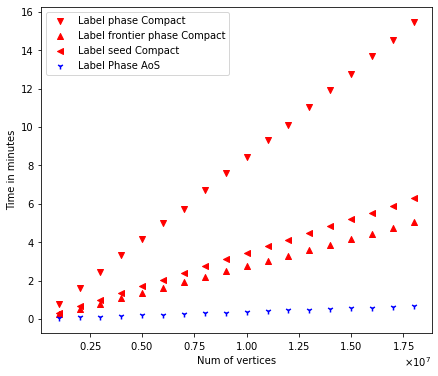

In [48]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
#plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_label_phases.pdf', bbox_inches='tight', dpi=300)


# Time by polylla phases

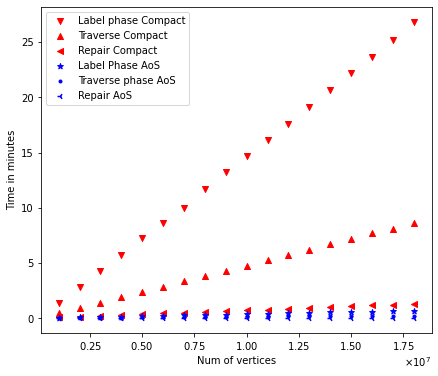

In [49]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'comp_time_polylla_phases.pdf', bbox_inches='tight', dpi=300)


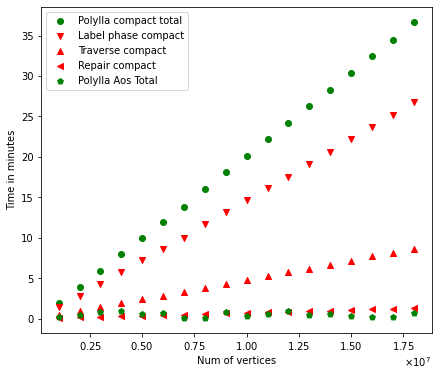

In [50]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_generate_polygonal_mesh, c="green",marker="o", label='Polylla compact total')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_total, c="red",marker="v", label='Label phase compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair compact')
plt.scatter(data_time_compact.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')


plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_compact_polylla_phases.pdf', bbox_inches='tight', dpi=300)



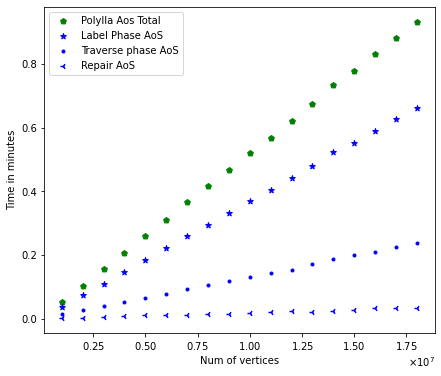

In [51]:

plt.scatter(data_time.n_vertices, data_time.time_to_generate_polygonal_mesh, c="green",marker="p", label='Polylla Aos Total')
plt.scatter(data_time.n_vertices, data_time.time_to_label_total, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='Traverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")
plt.savefig(r'time_polylla_AoS_phases.pdf', bbox_inches='tight', dpi=300)

# Memory comp general

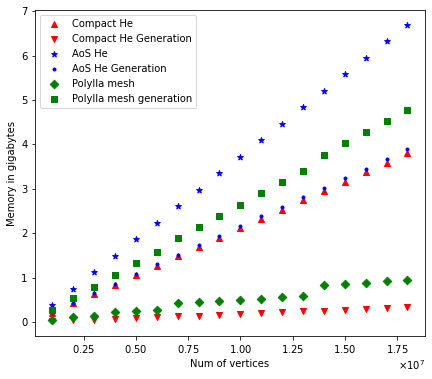

In [52]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')


plt.legend()
# https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
plt.ticklabel_format(style='sci', useMathText=True,  axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
plt.savefig(r'comp_memory_all.pdf', bbox_inches='tight', dpi=300)